In [4]:
#Predicción de las ganacias de acuerdo al medio

# y = m1x1 + m2x2 + ... + mnxn + b

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Obtención de la data y visualización
url = "https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv"
df = pd.read_csv(url, sep=",")
df = pd.read_csv(url, index_col=0)

print("Vista del Dataset")
print(df.head())

print("Información genereal de DataFrame")
print(df.info())


Vista del Dataset
      TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9
Información genereal de DataFrame
<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB
None


In [5]:
#Verificación y limpieza de datos, si no hay datos limpios se hace imputación
print("Conteo de valores nulos")
print(df.isnull().sum())

Conteo de valores nulos
TV           0
radio        0
newspaper    0
sales        0
dtype: int64


In [7]:
#División del conjunto de datos
X = df.drop(["sales"], axis=1)
y=df["sales"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #mezclar aleatoriamente los datos
#Escalamiento de características
print(f"Tamaño del conjunto de entrenamiento: {x_train.shape}, {y_train.shape}")
print(f"Tamaño del conjunto de prueba: {x_test.shape}, {y_test.shape}")

Tamaño del conjunto de entrenamiento: (160, 3), (160,)
Tamaño del conjunto de prueba: (40, 3), (40,)


In [8]:
#Escalamiento de las características

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [9]:
from sklearn.linear_model import LinearRegression
#Creación y entrenamiento del modelo
model = LinearRegression()
model.fit(x_train_scaled, y_train)

#Predicción de datos
y_pred = model.predict(x_test_scaled)


print("Primeras predicciones")
print(y_pred[:10])

Primeras predicciones
[16.4080242  20.88988209 21.55384318 10.60850256 22.11237326 13.10559172
 21.05719192  7.46101034 13.60634581 15.15506967]


In [10]:
#Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
rmse= np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Evaluación del modelo")
print(f"Error cuadrático medio (MSE) {mse:.3f}")
print(f"Raíz de error cuadrático medio (RMSE) {rmse:.3f}")
print(f"Coeficiente de determinación (R´2) {r2:.3f}")

Evaluación del modelo
Error cuadrático medio (MSE) 3.174
Raíz de error cuadrático medio (RMSE) 1.782
Coeficiente de determinación (R´2) 0.899


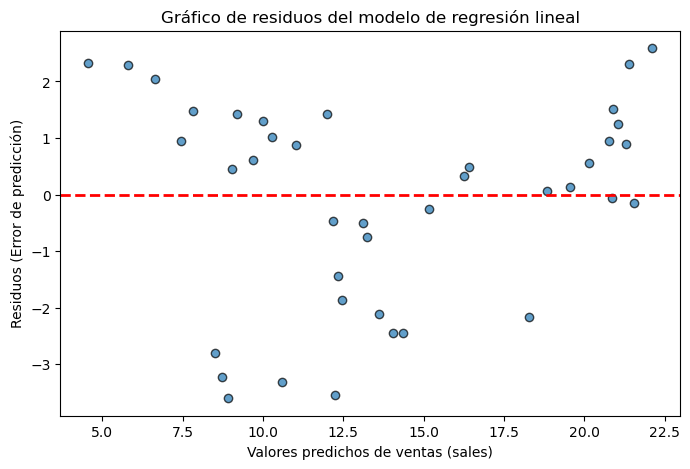

In [11]:
import matplotlib.pyplot as plt
residuos = y_test - y_pred
plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuos, alpha=0.7, edgecolors='k')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title("Gráfico de residuos del modelo de regresión lineal")
plt.xlabel("Valores predichos de ventas (sales)")
plt.ylabel("Residuos (Error de predicción)")
plt.show()